Lớp **Lập trình cho Khoa học dữ liệu - 17_21**  
Học kì II, 2019 - 2020  

<hr>
<br>
<center><b><font size="10">ĐỒ ÁN CUỐI KÌ</font></b></center>
<br>
<center>
    <font size="4"><b>Sinh viên thực hiện:</b></font>
    <br> Trần Minh Trí - 1712834<br>
</center>
<hr>

# I. Chủ đề quan tâm

<font size="4.5">  Tại sao Mỹ, một đất nước phát triển với nền tảng khoa học và cơ sở hạ tầng y tế tiên tiến hàng đầu thế giới lại đứng top 1 về số ca nhiễm và tử vong bởi **covid 19**? </font>

## 1. Một số thông tin về tình hình ở Mỹ trước khi dịch bùng phát 

Ca nhiễm covid 19 đầu tiên được phát hiện vào ngày **21/1**

Tổng thống Donald Trump ban bố tình trạng khẩn cấp quốc gia về covid 19 vào ngày **13/3**.

Theo [The Washington Post](https://www.washingtonpost.com/national-security/2020/04/04/coronavirus-government-dysfunction/?arc404=true): 
- Các thông tin cơ bản về virus corona không được thông báo đến Trump bởi các quan chức y tế cho đến 18/1. Cùng lúc đó, Trump đang đấu tranh trước các cáo buộc cưỡng chế chính trị đối với Ukraine. 

- Alex Azar, U.S. Serectary of Health and Human Services, kiềm chế không gây áp lực với tổng thống và thay vào đó, ông bảo Trump rằng "tình hình hiện tại đang được giám sát và đánh giá"

Theo [The New York Times](https://www.nytimes.com/2020/04/11/us/politics/coronavirus-trump-response.html): 
 - Những phản ứng với virus corona của Trump trong khoảng thời gian bị cáo buộc đã bị làm mờ bởi những nghi ngờ và khinh bỉ. Đối với ông, nhiều chuyên gia và quan chức có năng lực thuộc phe đối lập. 
 - Ông còn gọi dịch bệnh này là một "trò bịp" của phe Dân Chủ. Speaker of the House Nancy Pelosi ngược lại gọi phản hồi của chính quyền Trump trước cuộc khủng hoảng là mờ mịt và hỗn loạn

## 2. Các câu hỏi cần trả lời:

 1. Sự bùng phát dịch bệnh ở Mỹ xảy ra như thế nào? (Mức độ nhiễm qua từng tháng)
 2. Liệu bất ổn chính trị ở Mỹ có ảnh hưởng đến sự bùng phát dịch bệnh?
 3. Đưa ra dẫn chứng về bất ổn chính trị ở Mỹ ảnh hưởng đến sự lây lan của dịch bệnh

# II. Thu thập dữ liệu

Để có một bộ dữ liệu liên quan đến covid 19, ta tìm trên kaggle và tìm được [bộ dữ liệu sau](https://www.kaggle.com/sudalairajkumar/novel-corona-virus-2019-dataset) (file "covid_19_data.csv")

Ta thu thập thêm dữ liệu về các bang chịu ảnh hưởng lớn về chính trị 2 đảng phái lớn ở Mỹ và thu thập chính sách về việc "Bắt buộc đeo khẩu trang khi ra nơi công cộng" của các bang để xét xem có sự khác biệt. 

Dữ liệu thu được: [Chính kiến các bang](https://en.wikipedia.org/wiki/2016_United_States_presidential_election) và [Ngày bắt đầu luật bắt buộc đeo khẩu trang các bang](https://edition.cnn.com/2020/06/19/us/states-face-mask-coronavirus-trnd/index.html)

Ta ghi chép dữ liệu này vào file "US_Additional_Info.csv"

# III. Khám phá dữ liệu

In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import matplotlib.patches as mpatches

In [2]:
covid_info = pd.read_csv("covid_19_data.csv", index_col="SNo")
state_info = pd.read_csv("US_Additional_Info.csv")

In [3]:
covid_info.head()

,ObservationDate,Province/State,Country/Region,Last Update,Confirmed,Deaths,Recovered
SNo,,,,,,,
1,01/22/2020,Anhui,Mainland China,1/22/2020 17:00,1.0,0.0,0.0
2,01/22/2020,Beijing,Mainland China,1/22/2020 17:00,14.0,0.0,0.0
3,01/22/2020,Chongqing,Mainland China,1/22/2020 17:00,6.0,0.0,0.0
4,01/22/2020,Fujian,Mainland China,1/22/2020 17:00,1.0,0.0,0.0
5,01/22/2020,Gansu,Mainland China,1/22/2020 17:00,0.0,0.0,0.0


In [4]:
state_info.head()

,State,Must wear mask since,Politic
0,Alabama,15-07-20,Red
1,Alaska,NaN,Red
2,Arizona,NaN,Red
3,Arkansas,20-07-20,Red
4,California,18-06-20,Blue


Ở **covid_info**, ta có cột dữ liệu sau:
 - `ObservationDate`: Ngày mà dữ liệu lưu lại
 - `Province/State`: Tỉnh, khu vực, bang
 - `Country/Region`: Nước/vùng lãnh thổ
 - `Last Update`: Lần update cuối cùng trong ngày ObservationDate
 - `Confirmed`: Số ca nhiễm
 - `Deaths`: Số ca tử vong
 - `Recovered`: Số ca hồi phục

Ở **state_info**, ta có cột dữ liệu:
 - `State`: Tên bang ở Mỹ
 - `Must wear mask since`: Ngày luật bắt buộc đeo khẩu trang có hiệu lực
 - `Politic`: Đảng có ảnh hưởng lớn hơn ở bang này (Red = Republican, Blue = Democratic)

Ở **covid_info** ta chỉ quan tâm nước Mỹ, nên ta lọc **Country/Region	== US** và đồng thời bỏ cột Country/Region

Ta bỏ qua cột **Last Update**, chỉ chú trọng cột **ObservationDate**

In [5]:
covid_info = covid_info[covid_info["Country/Region"] == "US"].drop(["Last Update", "Country/Region"], axis=1)
covid_info.head()

,ObservationDate,Province/State,Confirmed,Deaths,Recovered
SNo,,,,,
32,01/22/2020,Washington,1.0,0.0,0.0
70,01/23/2020,Washington,1.0,0.0,0.0
118,01/24/2020,Washington,1.0,0.0,0.0
119,01/24/2020,Chicago,1.0,0.0,0.0
159,01/25/2020,Washington,1.0,0.0,0.0


In [6]:
covid_info.dtypes

ObservationDate     object
Province/State      object
Confirmed          float64
Deaths             float64
Recovered          float64
dtype: object

Cần convert **ObservationDate** sang DateTime

In [7]:
covid_info["ObservationDate"] = pd.to_datetime(covid_info["ObservationDate"], format="%m/%d/%Y")

In [8]:
covid_info.dtypes

ObservationDate    datetime64[ns]
Province/State             object
Confirmed                 float64
Deaths                    float64
Recovered                 float64
dtype: object

In [9]:
state_info.dtypes

State                   object
Must wear mask since    object
Politic                 object
dtype: object

Cần convert **Must wear mask since** sang DateTime

In [10]:
state_info["Must wear mask since"] = pd.to_datetime(state_info["Must wear mask since"], format="%d-%m-%y")

# IV. Sử dụng dữ liệu để trả lời các câu hỏi

## 1. Sự bùng phát dịch bệnh ở Mỹ xảy ra như thế nào? (Mức độ nhiễm qua từng tháng)

In [11]:
info_per_date = covid_info.groupby("ObservationDate").sum()

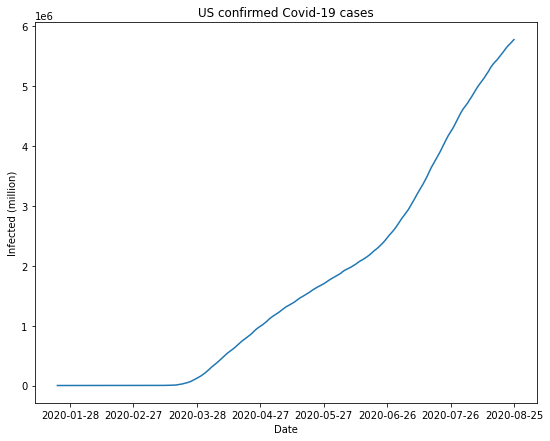

In [12]:
plt.figure(figsize=(9,7))
plt.plot(info_per_date["Confirmed"])

ax = plt.gca()
i = len(info_per_date["Confirmed"].index) - 1
tick = []
while i>=0:
    tick.append(info_per_date["Confirmed"].index[i])
    i-=30
ax.axes.xaxis.set_ticks(tick)

plt.xlabel("Date")
plt.ylabel("Infected (million)")
plt.title("US confirmed Covid-19 cases")
plt.show()

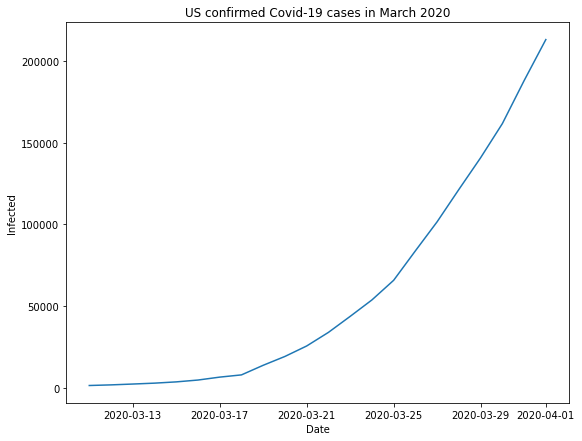

In [13]:
df = info_per_date[info_per_date.index >= "2020-03-11"]
df = df[df.index <= "2020-04-1"]
plt.figure(figsize=(9,7))
plt.plot(df["Confirmed"])
plt.xlabel("Date")
plt.ylabel("Infected")
plt.title("US confirmed Covid-19 cases in March 2020")
plt.show()

Ta thấy được số ca nhiễm dường như tăng đột biết vào khoảng giữa tháng 3, ngay sau khi tình trạng khẩn cấp quốc gia được ban bố nhưng cách ngày phát hiện ca nhiễm đầu tiên đến 2 tháng

Liệu trước đó đã có nhiều người nhiễm nhưng không phát hiện cho tới sau khi tình trạng khẩn cấp quốc gia?

## 2. Liệu bất ổn chính trị ở Mỹ có ảnh hưởng đến sự bùng phát dịch bệnh?

Để trả lời câu hỏi này, ta tìm hiểu mức độ lây nhiễm giữa các bang chịu ảnh hưởng chính trị bởi 2 đảng phái đối lập

Do các đảng phái có chính sách gần như đối lập khác nhau, nếu một phía có mức độ lây nhiễm cao hơn ta có thể kết luận sự bùng phát dịch bệnh một phần do bất ổn chính trị ở thời điểm đó và ngược lại

**Tiền xử lí**: 
 - Ở đây mình sẽ lấy dữ liệu tên các bang thuộc 2 đảng đối lập vào 2 mảng
 - Mỗi mảng tạo thành 2 df, **df_covid_info** là số ca nhiễm của các bang trong mảng đó, **df_covid_rate** là số ca nhiễm mới từng ngày

In [14]:
red_state = state_info[state_info["Politic"] == "Red"]["State"].to_numpy()
red_state

array(['Alabama', 'Alaska', 'Arizona', 'Arkansas', 'Colorado', 'Florida',
       'Georgia', 'Idaho', 'Indiana', 'Iowa', 'Kansas', 'Kentucky',
       'Louisiana', 'Michigan', 'Mississippi', 'Missouri', 'Montana',
       'Nebraska', 'North Carolina', 'North Dakota', 'Ohio', 'Oklahoma',
       'Pennsylvania', 'South Carolina', 'South Dakota', 'Tennessee',
       'Texas', 'Utah', 'West Virginia', 'Wisconsin', 'Wyoming'],
      dtype=object)

In [15]:
blue_state = state_info[state_info["Politic"] == "Blue"]["State"].to_numpy()
blue_state

array(['California', 'Connecticut', 'Delaware', 'Hawaii', 'Illinois',
       'Maine', 'Maryland', 'Massachusetts', 'Minnesota', 'Nevada',
       'New Hampshire', 'New Jersey', 'New Mexico', 'New York', 'Oregon',
       'Rhode Island', 'Vermont', 'Virginia', 'Washington'], dtype=object)

In [16]:
df_covid_info_blue = covid_info[covid_info["Province/State"].isin(blue_state)].groupby("ObservationDate").sum()
df_covid_rate_blue = df_covid_info_blue.diff()

df_covid_info_red = covid_info[covid_info["Province/State"].isin(red_state)].groupby("ObservationDate").sum()
df_covid_rate_red = df_covid_info_red.diff()

Như đã thấy ở câu 1, dữ liệu trước ngày ban bố tình trạng khẩn cấp có vẻ thiếu (?), nên ta bỏ những ngày đó ra (rút ngắn phần không cần thiết trên biểu đồ)

In [17]:
df_covid_info_blue = df_covid_info_blue[df_covid_info_blue.index >= "2020-03-11"]
df_covid_rate_blue = df_covid_rate_blue[df_covid_rate_blue.index >= "2020-03-11"]

df_covid_info_red = df_covid_info_red[df_covid_info_red.index >= "2020-03-11"]
df_covid_rate_red = df_covid_rate_red[df_covid_rate_red.index >= "2020-03-11"]

Text(0, 0.5, 'New infection')

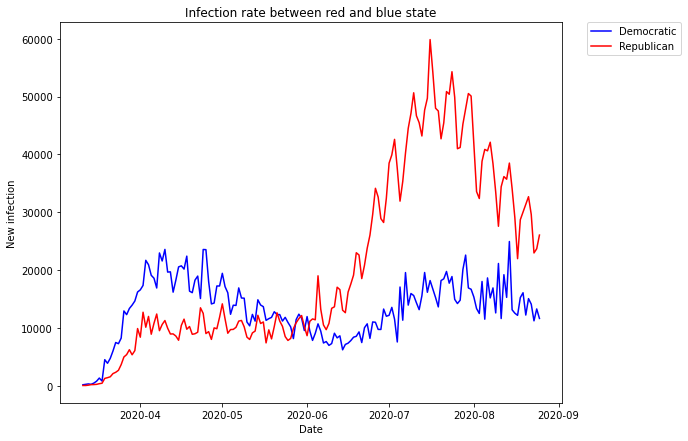

In [18]:
plt.figure(figsize=(9,7))
plt.plot(df_covid_rate_blue["Confirmed"], 'b', label='Democratic')
plt.plot(df_covid_rate_red["Confirmed"], 'r', label='Republican')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0.)
plt.title("Infection rate between red and blue state")
plt.xlabel("Date")
plt.ylabel("New infection")

Text(0, 0.5, 'Infected (million)')

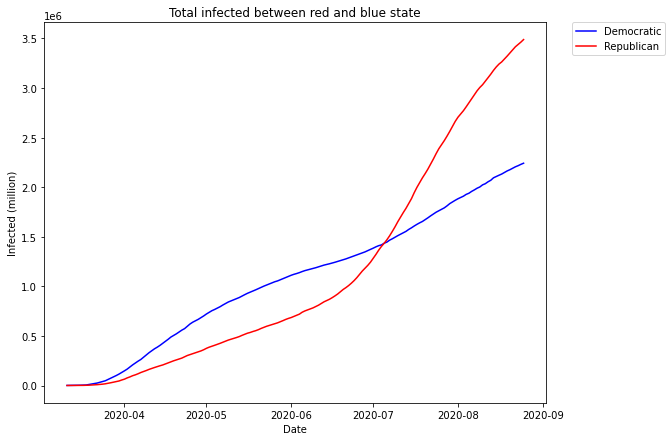

In [19]:
plt.figure(figsize=(9,7))
plt.plot(df_covid_info_blue["Confirmed"], 'b', label='Democratic')
plt.plot(df_covid_info_red["Confirmed"], 'r', label='Republican')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0.)
plt.title("Total infected between red and blue state")
plt.xlabel("Date")
plt.ylabel("Infected (million)")

Ta thấy rõ ràng dù ban đầu phía Democratic có số tốc độ lây nhiễm cao hơn (tháng 4, 5) nhưng về sau nó đã được không chế xuống. Cùng lúc đó phía Republican tăng không kiểm soát đến giữa tháng 7 mới có dấu hiệu sụt giảm nhưng vẫn còn cao

-> Chính sách đối lập của các bang có ảnh hưởng đến sự bùng phát dịch bệnh

## 3. Dẫn chứng về bất ổn chính trị ở Mỹ ảnh hưởng đến sự lây lan của dịch bệnh

Ta cần chỉ ra một sự khác biệt chính sách giữa 2 đảng đối lập chính, ở đây sử dụng ngày bắt đầu ban hành luật "Bắt buộc đeo khẩu trang ở nơi công cộng". Ta xem xét số lượng nhiễm khi luật bắt đầu có hiệu lực, đối với những bang chưa ban hành ta xem như hiện tại là "số lượng nhiễm khi luật bắt đầu"

**Tiền xử lí**:
 - **per_state_info** là df chứa thông tin số ca nhiễm, chết, hồi phục chia ra từng bang
 - **state_info_filled_NaN** được tạo là một copy của **state_info** để fillna = "25-08-20", thực hiện ý >đối với những bang chưa ban hành ta xem như hiện tại là "số lượng nhiễm khi luật bắt đầu"< ở trên. Tạo copy là để khi plot dùng df ban đầu vẫn có thể hiện nan ở những thời gian nan
 - Khi đã có số ngày, tên bang và số ca nhiễm mỗi ngày/bang, thực hiện thêm một cột "Confirmed before" vào **state_info**

In [20]:
per_state_info = covid_info.groupby(["ObservationDate", "Province/State"]).agg("sum").unstack("Province/State")

In [21]:
state_info_filled_NaN = state_info.copy()
state_info_filled_NaN['Must wear mask since'] = state_info_filled_NaN['Must wear mask since'].fillna("25-08-20")

In [22]:
confirmed_at_in_effect_date = []

for i in range(state_info.shape[0]):
    state = state_info_filled_NaN["State"][i]
    in_effect_date = state_info_filled_NaN["Must wear mask since"][i]
    
    in_effect_date = pd.to_datetime(in_effect_date, format="%d-%m-%y")
    
    x = per_state_info[per_state_info.index == in_effect_date]["Confirmed", state]
    
    confirmed_at_in_effect_date.append(x.values[0])
    
state_info["Confirmed before"] = confirmed_at_in_effect_date

In [23]:
state_info

,State,Must wear mask since,Politic,Confirmed before
0,Alabama,2020-07-15,Red,59067.0
1,Alaska,NaT,Red,4843.0
2,Arizona,NaT,Red,199273.0
3,Arkansas,2020-07-20,Red,33927.0
4,California,2020-06-18,Blue,167086.0
5,Colorado,2020-07-17,Red,39326.0
6,Connecticut,2020-04-20,Blue,19815.0
7,Delaware,2020-04-28,Blue,4575.0
8,Florida,NaT,Red,605502.0
9,Georgia,NaT,Red,258354.0


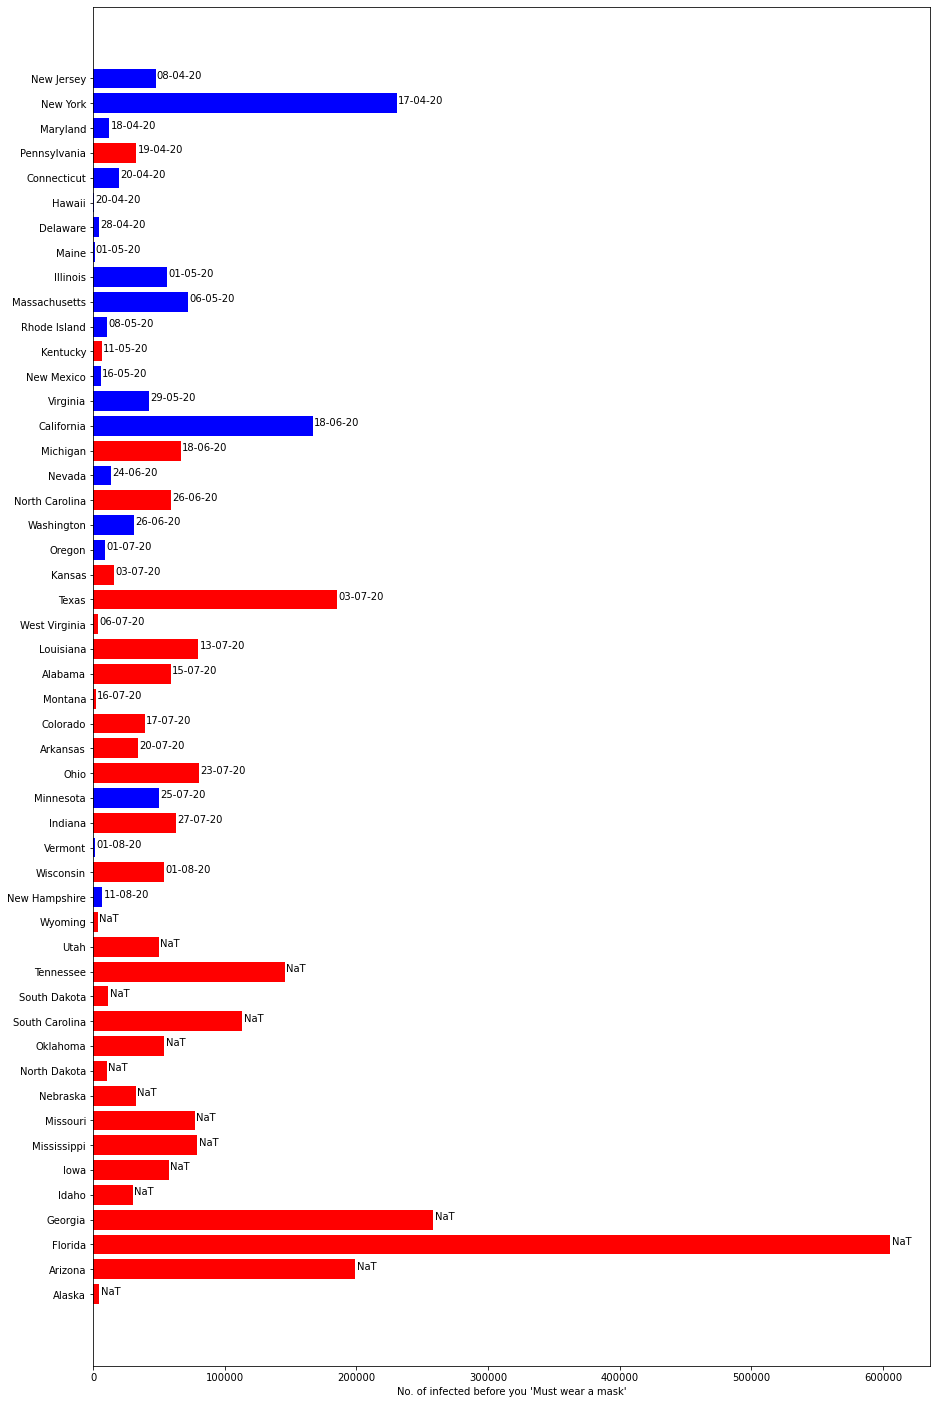

In [24]:
df = state_info.sort_values(by=['Must wear mask since'], ascending=False, na_position="first")

plt.figure(figsize=(15,25))
plt.barh(df["State"], df["Confirmed before"], color=df["Politic"])
plt.xlabel("No. of infected before you 'Must wear a mask'")

i = 0
for x in df.index:
    value = df["Confirmed before"][x]
    text = df["Must wear mask since"][x]
    if not pd.isnull(text):
        text = text.strftime("%d-%m-%y")
    plt.text(value+1000, i, text, color='black')
    i+= 1

plt.show()

Ta thấy toàn bộ các bang Democratic đã có luật ban hành bắt buộc đeo khẩu trang khá sớm trong giai đoạn bùng phát dịch và khi có số lượng nhiễm ít. 

Còn ở các bang Republican, nhiều bang không bắt buộc đeo khẩu trang, đặc biệt ở một số nơi có số ca nhiễm cao như Florida, Georgia, Arizona

Nếu như một việc đơn giản như phải đeo khẩu trang còn có chính sách khác biệt đến vậy, những vấn đề quan trọng hơn sẽ ra sao?

# V. Nhìn lại quá trình làm đồ án

## Thuận lợi:

 - Nhờ sự quan tâm cao đến covid-19 mà chủ đề chính và data quan trọng có thể dễ dàng tìm kiếm
 
 - Giả thuyết ban đầu khá mơ hồ nhưng dữ liệu thực sự ủng hộ

## Khó khăn:

 - Thời gian làm đồ án có quá nhiều đồ án khác (4) chồng lên nhau.
 
 - Dữ liệu về sự khác biệt chính sách giữa các đảng đối lập Mỹ khó tìm (có các thông tin nhưng không thể thể hiện cụ thể các thông tin đó ra dữ liệu)

## Có thời gian thêm thì sẽ làm gì:

 - Tìm thêm dữ liệu cho câu 3, thể hiện rõ hơn và tăng tính thuyết phục của giả thuyết

# VI. Tài liệu tham khảo

https://www.kaggle.com/sudalairajkumar/novel-corona-virus-2019-dataset

https://en.wikipedia.org/wiki/2016_United_States_presidential_election

https://edition.cnn.com/2020/06/19/us/states-face-mask-coronavirus-trnd/index.html

Đa phần khi bí: https://pandas.pydata.org/ và https://stackoverflow.com/